In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("luisandresgarcia/stock-market-prediction")

print("Path to dataset files:", path)

100%|██████████| 41.5M/41.5M [00:17<00:00, 2.51MB/s]

Extracting files...


Path to dataset files: C:\Users\KIIT\.cache\kagglehub\datasets\luisandresgarcia\stock-market-prediction\versions\8


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [22]:
import os

# Correct path to dataset directory
data_dir = r"C:\Users\KIIT\.cache\kagglehub\datasets\luisandresgarcia\stock-market-prediction\versions\8"

# List all files in the dataset directory
files = os.listdir(data_dir)
print(f"Files in dataset directory: {files}")


Files in dataset directory: ['infolimpioavanzadoTarget.csv']


In [25]:
import os
import pandas as pd

# Path to stock news dataset
data_dir = r"C:\Users\KIIT\.cache\kagglehub\datasets\luisandresgarcia\stock-market-prediction\versions\8"

# Load the correct stock news data
news_data_path = os.path.join(data_dir, 'infolimpioavanzadoTarget.csv')  # Updated file name
news_df = pd.read_csv(news_data_path)

# Display the first few rows of the dataset
print(news_df.head())


         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [30]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Display the column names to understand the structure of the dataset
print(news_df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the stock dataset
data_path = r"C:\Users\KIIT\.cache\kagglehub\datasets\luisandresgarcia\stock-market-prediction\versions\8\infolimpioavanzadoTarget.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())

# Handle missing data by filling it with forward fill method
df.fillna(method='ffill', inplace=True)

# Select relevant columns for prediction (you can choose other columns as well)
features = ['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15']  # Adjust features if needed
target = 'TARGET'  # Column to predict (adjust if needed)

# Split data into features and target
X = df[features]
y = df[target]

# Normalize the features (scaling for LSTM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

C:\Users\KIIT\AppData\Local\Temp\ipykernel_38040\3123115087.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Preprocessing Function
def preprocess_data(df, features, target):
    """
    Preprocess the data: fill missing values, scale features, and split into train/test sets.
    
    Args:
    - df: The dataframe containing the dataset
    - features: List of columns to be used as features
    - target: Column to be predicted
    
    Returns:
    - X_train, X_test: Training and testing feature sets
    - y_train, y_test: Training and testing target values
    """
    # Fill missing values using forward fill
    df.fillna(method='ffill', inplace=True)
    
    # Verify if there are any remaining missing values
    print(f"Missing values after filling: \n{df.isnull().sum()}")
    
    # Select features and target
    X = df[features]
    y = df[target]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [41]:
def check_missing_values(df):
    """
    Check for missing values in the dataset.
    """
    missing_values = df.isnull().sum()
    print(f"Missing values in each column:\n{missing_values}")
    return missing_values


In [42]:
from sklearn.impute import SimpleImputer

def preprocess_data_with_imputation(df, features, target):
    """
    Preprocess the data with imputation to handle missing values.
    """
    # Impute missing values in features using the mean strategy
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    
    # Check if there are any missing values left
    missing_values = df.isnull().sum()
    print(f"Missing values after imputation:\n{missing_values}")
    
    # Select features and target
    X = df[features]
    y = df[target]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


Missing values after imputation:
date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    16
volumenrelativo      0
diff                 0
INCREMENTO           0
TARGET               0
Length: 1285, dtype: int64
Mean Squared Error (Linear Regression): 0.13918462569704265


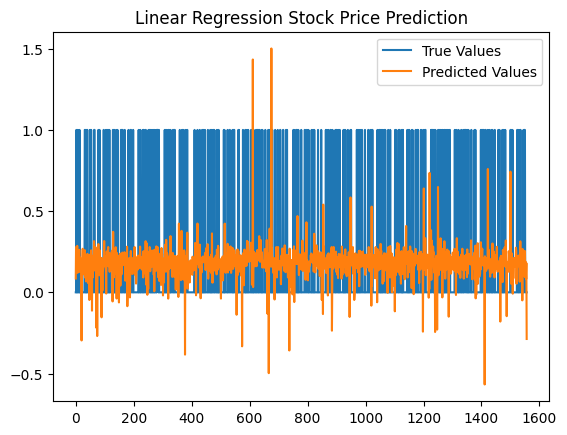

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Step 1: Preprocess the data with imputation
def preprocess_data_with_imputation(df, features, target):
    """
    Preprocess the data with imputation to handle missing values.
    """
    # Impute missing values in features using the mean strategy
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    
    # Check if there are any missing values left
    missing_values = df.isnull().sum()
    print(f"Missing values after imputation:\n{missing_values}")
    
    # Select features and target
    X = df[features]
    y = df[target]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Step 2: Define features and target columns
features = ['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15', 'diff', 'stochastic-k-15']  # Update with your selected features
target = 'TARGET'  # Update with your target column

# Step 3: Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data_with_imputation(df, features, target)

# Step 4: Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = lin_reg.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse}')

# Step 7: Plot the results
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.title('Linear Regression Stock Price Prediction')
plt.show()


In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_data_for_lstm(df, features, target, time_steps=60):
    """
    Preprocess the data for LSTM model by imputing missing values, scaling, and creating time sequences.
    """
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df[features] = imputer.fit_transform(df[features])
    
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features])
    
    # Prepare data for LSTM (create sequences of time_steps)
    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, :])
        y.append(df[target].iloc[i])
    
    X, y = np.array(X), np.array(y)
    
    # Split data into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    return X_train, X_test, y_train, y_test, scaler


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.1420
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1435
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1458
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1452
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1477
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1425
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1442
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1434
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1433
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1496
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Mean Squared Error (LSTM): 0.15514841102260526


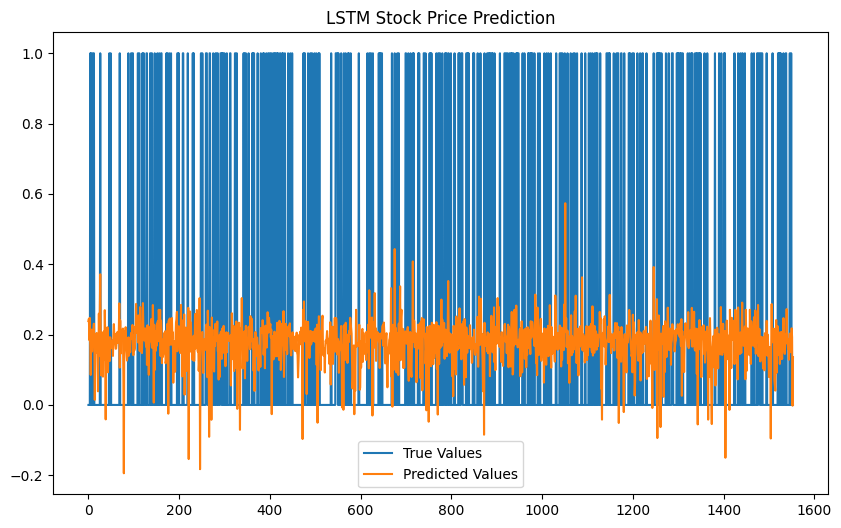

LSTM model saved successfully!


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Preprocess data for LSTM
def preprocess_data_for_lstm(df, features, target):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df[features + [target]])
    
    X, y = [], []
    lookback = 15  # Define how many previous steps to consider for prediction
    for i in range(lookback, len(df_scaled)):
        X.append(df_scaled[i-lookback:i, :-1])
        y.append(df_scaled[i, -1])
    
    X, y = np.array(X), np.array(y)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

# Train and evaluate LSTM model
def train_and_evaluate_lstm(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    
    # Make predictions
    y_pred_lstm = model.predict(X_test)
    
    # Evaluate the model
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    print(f'Mean Squared Error (LSTM): {mse_lstm}')
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True Values')
    plt.plot(y_pred_lstm, label='Predicted Values')
    plt.legend()
    plt.title('LSTM Stock Price Prediction')
    plt.show()
    
    return model

# Load your dataframe
# df = pd.read_csv('your_stock_data.csv')

features = ['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15', 'diff', 'stochastic-k-15']
target = 'TARGET'  # Replace with your actual target column

# Preprocess data
X_train, X_test, y_train, y_test, scaler = preprocess_data_for_lstm(df, features, target)

# Train, evaluate, and save the LSTM model
model = train_and_evaluate_lstm(X_train, X_test, y_train, y_test)
model.save('lstm_model.h5')
print("LSTM model saved successfully!")



In [66]:
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Save the Linear Regression model
def save_linear_regression_model(lin_reg):
    joblib.dump(lin_reg, 'linear_regression_model.pkl')
    print("Linear Regression model saved successfully!")

# Save the LSTM model
def save_lstm_model(model):
    model.save('lstm_model.h5')
    print("LSTM model saved successfully!")

# Train the LSTM model
def train_lstm(X_train, y_train):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    return model

# Evaluate the Linear Regression model
def evaluate_linear_regression(X_test, y_test, y_pred_lr):
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")
    
    # Plot the results
    plt.figure(figsize=(14,7))
    plt.plot(y_test, label='True Values (LR)')
    plt.plot(y_pred_lr, label='Predicted Values (LR)')
    plt.legend()
    plt.title('Linear Regression Stock Price Prediction')
    plt.show()
    
    return mse_lr, r2_lr

# Evaluate the LSTM model
def evaluate_lstm(y_test, y_pred_lstm):
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    r2_lstm = r2_score(y_test, y_pred_lstm)
    print(f"LSTM - MSE: {mse_lstm}, R²: {r2_lstm}")
    
    # Plot the results
    plt.figure(figsize=(14,7))
    plt.plot(y_test, label='True Values (LSTM)')
    plt.plot(y_pred_lstm, label='Predicted Values (LSTM)')
    plt.legend()
    plt.title('LSTM Stock Price Prediction')
    plt.show()
    
    return mse_lstm, r2_lstm

# Example usage:

# Assuming you have trained your Linear Regression model and assigned it to 'lin_reg'
save_linear_regression_model(lin_reg)




Linear Regression model saved successfully!


In [71]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def preprocess_for_lstm(df, features, target, time_steps=60):
    """
    Preprocess data for LSTM by scaling and reshaping it into a time-series format.
    """
    # Extract features and target
    X = df[features].values
    y = df[target].values
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)
    
    # Prepare the data for LSTM
    X_lstm = []
    y_lstm = []
    
    # Create sequences of time_steps for X and corresponding target for y
    for i in range(time_steps, len(scaled_features)):
        X_lstm.append(scaled_features[i-time_steps:i])  # past time_steps values
        y_lstm.append(y[i])  # target value for current time step
    
    # Convert to numpy arrays
    X_lstm = np.array(X_lstm)
    y_lstm = np.array(y_lstm)
    
    return X_lstm, y_lstm, scaler



In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess for LSTM
def preprocess_for_lstm(df, features, target, time_steps=60):
    X = df[features].values
    y = df[target].values

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)

    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(scaled_features)):
        X_lstm.append(scaled_features[i-time_steps:i])
        y_lstm.append(y[i])

    return np.array(X_lstm), np.array(y_lstm), scaler

# Assuming df, features, and target are already defined
X_lstm, y_lstm, scaler_lstm = preprocess_for_lstm(df, features, target)

# Split the data into training and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 1. Reshape X_test_lstm for Linear Regression model
X_test_linear = X_test_lstm.reshape(X_test_lstm.shape[0], -1)

# 2. Evaluate Linear Regression model
y_pred_linear = linear_reg_model.predict(X_test_linear)
mse_linear = mean_squared_error(y_test_lstm, y_pred_linear)
r2_linear = r2_score(y_test_lstm, y_pred_linear)
print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R-squared: {r2_linear}")

# 3. Evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
print(f"LSTM - Mean Squared Error: {mse_lstm}")
print(f"LSTM - R-squared: {r2_lstm}")

# 4. Visualize the results for comparison
plt.figure(figsize=(14, 7))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.plot(y_test_lstm, label='True Values', color='blue')
plt.plot(y_pred_linear, label='Linear Regression Predictions', linestyle='--', color='orange')
plt.title('Linear Regression Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Target Value')
plt.legend()

# LSTM Plot
plt.subplot(1, 2, 2)
plt.plot(y_test_lstm, label='True Values', color='blue')
plt.plot(y_pred_lstm, label='LSTM Predictions', linestyle='--', color='green')
plt.title('LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()



ValueError: X has 480 features, but LinearRegression is expecting 8 features as input.